In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Load dataset
data = pd.read_csv('diabetes.csv')


In [4]:

# Split dataset
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lgbm = LGBMClassifier(random_state=42)
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
catboost = CatBoostClassifier(random_state=42, verbose=0)

# Fit models
lgbm.fit(X_train, y_train)
xgb.fit(X_train, y_train)
catboost.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_catboost = catboost.predict(X_test)


[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/home/oliver/.local/share/virtualenvs/ThomsonReutersTest-zy_qQDq4/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [18:37:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


LightGBM Performance:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.59      0.69      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.79      0.74      0.76        99
           1       0.58      0.65      0.62        55

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154


CatBoost Performance:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighte

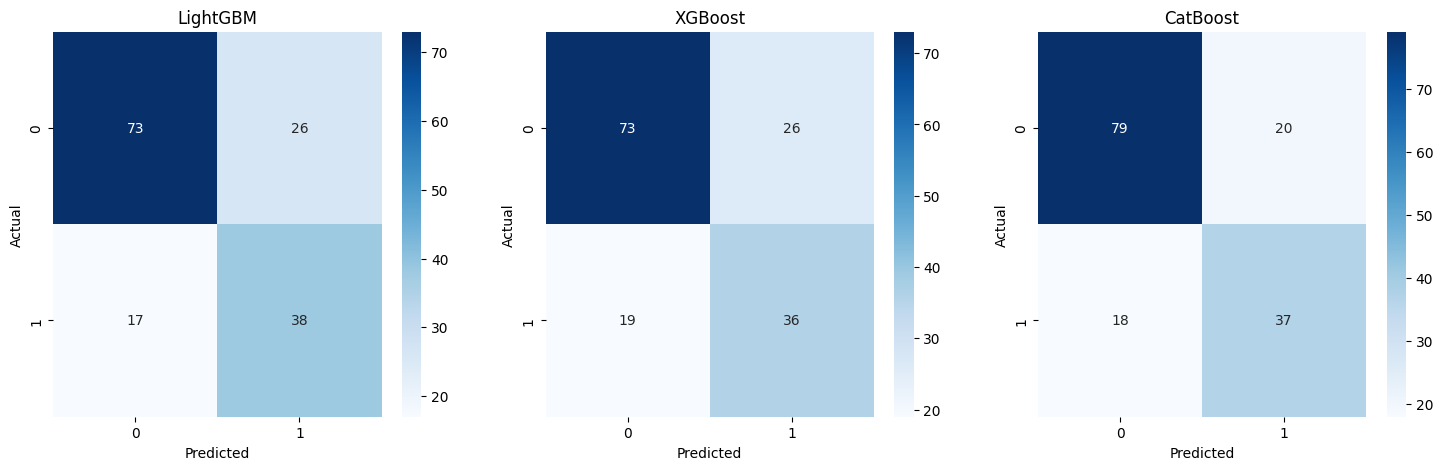

In [5]:
# Evaluate models
print("LightGBM Performance:")
print(classification_report(y_test, y_pred_lgbm))
print("\nXGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("\nCatBoost Performance:")
print(classification_report(y_test, y_pred_catboost))

# Confusion matrices
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('LightGBM')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('XGBoost')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

sns.heatmap(conf_matrix_catboost, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('CatBoost')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.show()

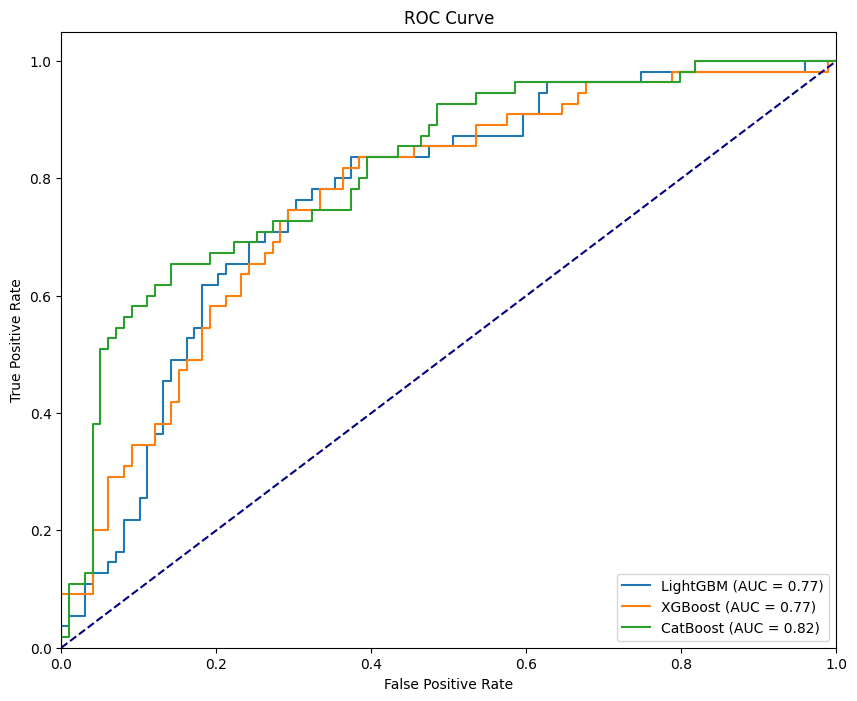

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve


models = {
    "LightGBM": lgbm,
    "XGBoost": xgb,
    "CatBoost": catboost
}

plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
